<a href="https://colab.research.google.com/github/harsha5428/datascience_project/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Load column names from the specified text file
columns_file_path_bre = '/content/drive/MyDrive/Colab Notebooks/breast+cancer+wisconsin+diagnostic/column_name_breast.txt'
with open(columns_file_path_bre, 'r') as file:
    column_names_bre = file.read().splitlines()

# Load the main dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/breast+cancer+wisconsin+diagnostic/wdbc.data'
data_bre = pd.read_csv(file_path, header=None, names=column_names_bre)

# Display the first few rows to verify
print(data_bre.head())


         ID Diagnosis  Radius Mean  Texture Mean  Perimeter Mean  Area Mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Smoothness Mean  Compactness Mean  Concavity Mean  Concave Points Mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Radius Worst  Texture Worst  Perimeter Worst  Area Wor

In [ ]:
data_bre.isnull().sum()

,0
ID,0
Diagnosis,0
Radius Mean,0
Texture Mean,0
Perimeter Mean,0
Area Mean,0
Smoothness Mean,0
Compactness Mean,0
Concavity Mean,0
Concave Points Mean,0


In [ ]:
data_bre.drop(["ID"], inplace=True, axis=1)
data_bre.head()

,Diagnosis,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,...,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data_bre.shape
data_bre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    object 
 1   Radius Mean              569 non-null    float64
 2   Texture Mean             569 non-null    float64
 3   Perimeter Mean           569 non-null    float64
 4   Area Mean                569 non-null    float64
 5   Smoothness Mean          569 non-null    float64
 6   Compactness Mean         569 non-null    float64
 7   Concavity Mean           569 non-null    float64
 8   Concave Points Mean      569 non-null    float64
 9   Symmetry Mean            569 non-null    float64
 10  Fractal Dimension Mean   569 non-null    float64
 11  Radius SE                569 non-null    float64
 12  Texture SE               569 non-null    float64
 13  Perimeter SE             569 non-null    float64
 14  Area SE                  5

In [ ]:
data_bre.describe()

,Radius Mean,Texture Mean,Perimeter Mean,Area Mean,Smoothness Mean,Compactness Mean,Concavity Mean,Concave Points Mean,Symmetry Mean,Fractal Dimension Mean,...,Radius Worst,Texture Worst,Perimeter Worst,Area Worst,Smoothness Worst,Compactness Worst,Concavity Worst,Concave Points Worst,Symmetry Worst,Fractal Dimension Worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
malig_count_bre = data_bre['Diagnosis'].value_counts().get('M')
begn_count_bre = data_bre['Diagnosis'].value_counts().get('B')

print('Num of malignant cases:', malig_count_bre)
print('Num of benign cases:', begn_count_bre)

Num of malignant cases: 212
Num of benign cases: 357


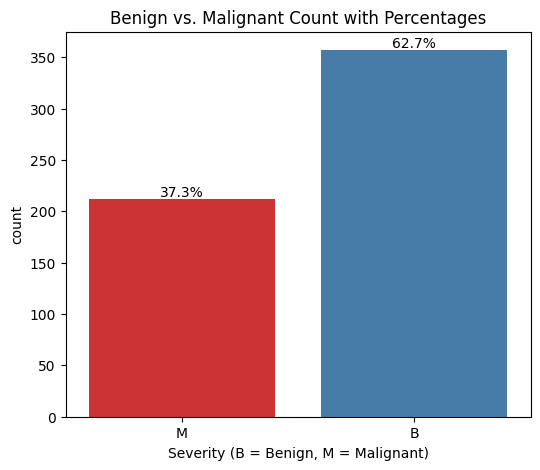

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
ax = sns.countplot(data=data_bre, x='Diagnosis',hue='Diagnosis', palette='Set1',legend=False)
total = len(data_bre)
# Add percentage labels above each bar
for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.1f}%"
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Benign vs. Malignant Count with Percentages')
plt.xlabel('Severity (B = Benign, M = Malignant)')
plt.show()


In [ ]:
data_bre['Diagnosis'] = data_bre['Diagnosis'].replace({'B': 0,'M': 1})

<ipython-input-9-8f79917cba45>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_bre['Diagnosis'] = data_bre['Diagnosis'].replace({'B': 0,'M': 1})


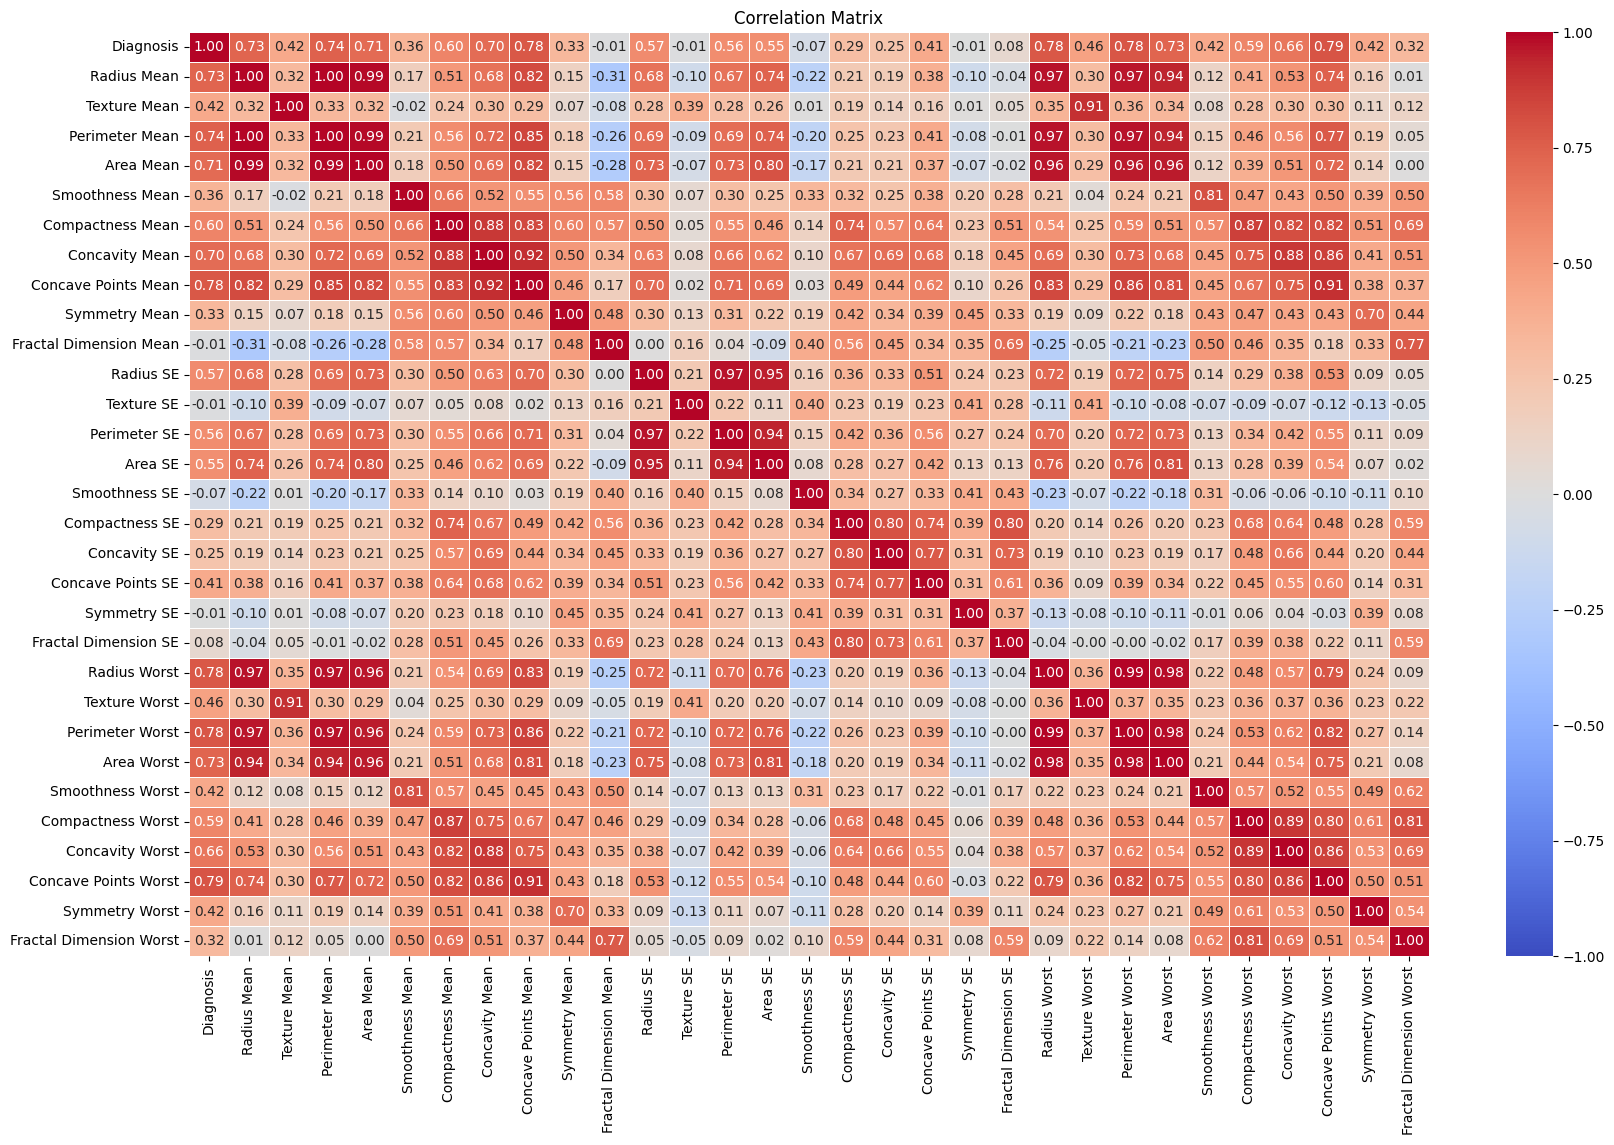

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data_bre.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 12))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# 1. Identify Highly Correlated Features
# Set correlation threshold
correlation_threshold = 0.9

# Create the correlation matrix (excluding target variable)
correlation_matrix = data_bre.drop(columns=['Diagnosis']).corr()

# Mask the upper triangle of the correlation matrix to avoid redundancy
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Get the indices of features with high correlation (above the threshold)
highly_correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.append(colname)

# Remove duplicate entries if any
highly_correlated_features = list(set(highly_correlated_features))

# Print the features that will be dropped
print("Highly correlated features (will be dropped):", highly_correlated_features)

# 2. Remove the highly correlated features from the dataset (exclude target variable)
data_bre_clean = data_bre.drop(columns=highly_correlated_features)

# 3. Re-add the target variable back to the cleaned dataset
data_bre_clean['Diagnosis'] = data_bre['Diagnosis']



Highly correlated features (will be dropped): ['Perimeter Mean', 'Concave Points Worst', 'Area Mean', 'Perimeter Worst', 'Texture Worst', 'Concave Points Mean', 'Perimeter SE', 'Area SE', 'Area Worst', 'Radius Worst']


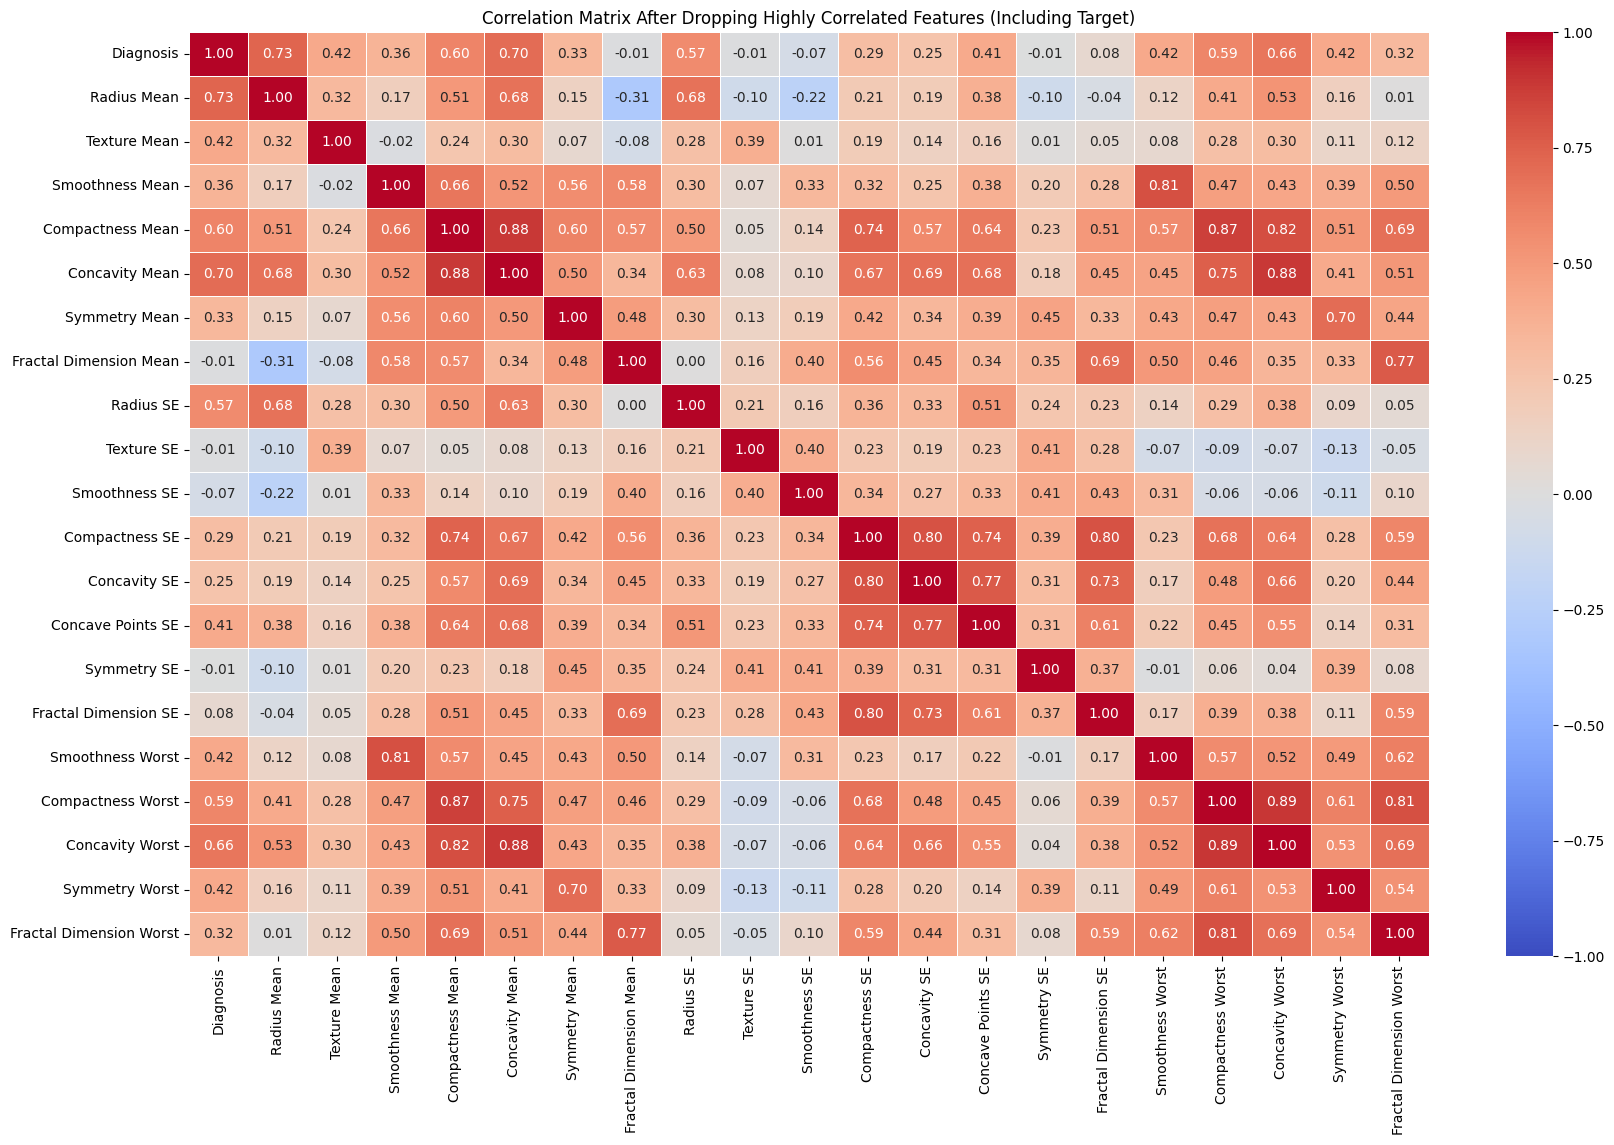

In [ ]:
# 4. Create the correlation matrix for the cleaned dataset (including target variable)
correlation_matrix_cleaned = data_bre_clean.corr()

# Visualize the correlation matrix after removing highly correlated features
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix After Dropping Highly Correlated Features (Including Target)")
plt.show()


In [ ]:
data_bre_clean.shape

(569, 21)

In [ ]:
data_bre_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    int64  
 1   Radius Mean              569 non-null    float64
 2   Texture Mean             569 non-null    float64
 3   Smoothness Mean          569 non-null    float64
 4   Compactness Mean         569 non-null    float64
 5   Concavity Mean           569 non-null    float64
 6   Symmetry Mean            569 non-null    float64
 7   Fractal Dimension Mean   569 non-null    float64
 8   Radius SE                569 non-null    float64
 9   Texture SE               569 non-null    float64
 10  Smoothness SE            569 non-null    float64
 11  Compactness SE           569 non-null    float64
 12  Concavity SE             569 non-null    float64
 13  Concave Points SE        569 non-null    float64
 14  Symmetry SE              5

In [ ]:
# Function for Cross-Validation
def perform_cross_validation(model, X, y, cv=5, scoring='f1'):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    print(f"Cross-validation scores ({scoring}): {cv_scores}")
    print(f"Average cross-validation score ({scoring}): {np.mean(cv_scores):.4f}")
    return np.mean(cv_scores)

In [ ]:
# Function for Plotting Learning Curve
def plot_learning_curve(estimator, X, y, cv=5, scoring='accuracy', title='Learning Curve', train_sizes=np.linspace(0.1, 1.0, 10)):
    print("Starting Learning Curve Analysis...")
    print(f"Estimator: {estimator}")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, train_sizes=train_sizes, random_state=42, n_jobs=-1)
    train_mean, train_std = np.mean(train_scores, axis=1), np.std(train_scores, axis=1)
    test_mean, test_std = np.mean(test_scores, axis=1), np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='orange', marker='s')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')
    plt.title(title, fontsize=16)
    plt.xlabel('Training Set Size', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.show()

In [ ]:
# Define features and target after removing highly correlated features
X_clean = data_bre_clean.drop(columns=['Diagnosis'])
y_clean = data_bre_clean['Diagnosis']

# 4. Train-Test Split and Standardization (on cleaned data)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Hyperparameter Tuning for Imbalanced Data
param_grid_rf = {
    'n_estimators': [30, 50, 100],
    'max_depth': [5, 6, 7],  # Experiment with reducing or slightly increasing depth
    'min_samples_split': [15, 20, 25],  # Test nearby values for optimal split size
    'min_samples_leaf': [6, 8, 10],  # Adjust minimum leaf size to reduce variance
    'max_features': ['sqrt', 'log2'],  # Explore using logarithmic feature count for splits
    'max_samples': [0.5, 0.6, 0.7]  # Experiment with seeing more training data for each tree
}


In [ ]:
### Scenario 1: Train Random Forest on Imbalanced Data ###
print("\n----- Training on Imbalanced Data -----")
rf = RandomForestClassifier(
    n_estimators=30,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=8,
    max_features='sqrt',
    max_samples=0.5,
    random_state=42
)



rf.fit(X_train, y_train)
perform_cross_validation(rf, X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy (Imbalanced Data):", accuracy_score(y_test, y_pred_rf))



----- Training on Imbalanced Data -----
Cross-validation scores (f1): [0.84375    0.90322581 0.91666667 0.9375     0.92537313]
Average cross-validation score (f1): 0.9053
Random Forest Accuracy (Imbalanced Data): 0.956140350877193


In [ ]:
print("Classification Report (Imbalanced Data):\n", classification_report(y_test, y_pred_rf, target_names=['Benign', 'Malignant']))

Classification Report (Imbalanced Data):
               precision    recall  f1-score   support

      Benign       0.96      0.97      0.97        71
   Malignant       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



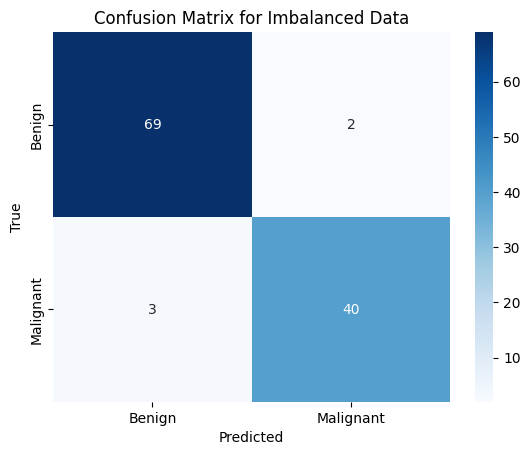

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Imbalanced Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
plot_learning_curve(rf, X_train, y_train, cv=5, title="Learning Curve for Imbalanced Data")

Starting Learning Curve Analysis...
Estimator: RandomForestClassifier(max_depth=6, max_samples=0.5, min_samples_leaf=8,
                       min_samples_split=20, n_estimators=30, random_state=42)



KeyboardInterrupt



In [ ]:
#hyper parameter tuning for imbalance
grid_rf_imbalanced = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_grid=param_grid_rf,
                                   cv=5, scoring='accuracy', n_jobs=-1)
grid_rf_imbalanced.fit(X_train, y_train)

# Print the best parameters and score for the imbalanced dataset
print("Best parameters for Random Forest (Imbalanced Data):", grid_rf_imbalanced.best_params_)
print("Best cross-validated accuracy (Imbalanced Data):", grid_rf_imbalanced.best_score_)

# Train the model with the best parameters
best_rf_imbalanced = grid_rf_imbalanced.best_estimator_
best_rf_imbalanced.fit(X_train, y_train)
y_pred_best_rf_imbalanced = best_rf_imbalanced.predict(X_test)

In [ ]:
# Compute the confusion matrix
conf_matrix_best_rf_imbalanced = confusion_matrix(y_test, y_pred_best_rf_imbalanced)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_best_rf_imbalanced, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Best Random Forest (Imbalanced Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:

# Save the model to Google Drive
joblib.dump(best_rf_imbalanced, '/content/drive/My Drive/best_rf_model_imbalanced.pkl')

In [ ]:
# Print the classification report for the best model
print("Classification Report for Best Random Forest (Imbalanced Data):\n", classification_report(y_test, y_pred_best_rf_imbalanced, target_names=['Benign', 'Malignant']))


In [ ]:
plot_learning_curve(best_rf_imbalanced, X_train, y_train, cv=5, title="Learning Curve for Best Random Forest (Imbalanced Data)")

In [ ]:
### Scenario 2: Apply RFE on Imbalanced Data and Train Model ###
print("\n----- Training with RFE on Imbalanced Data -----")
rfe_selector = RFE(estimator=rf, n_features_to_select=10, step=1)
rfe_selector.fit(X_train, y_train)
X_train_rfe = rfe_selector.transform(X_train)
X_test_rfe = rfe_selector.transform(X_test)
rf_rfe = RandomForestClassifier(
    n_estimators=30,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=8,
    max_features='sqrt',
    max_samples=0.5,
    random_state=42
)
rf_rfe.fit(X_train_rfe, y_train)
perform_cross_validation(rf_rfe, X_train_rfe, y_train)
y_pred_rfe = rf_rfe.predict(X_test_rfe)
print("Random Forest Accuracy (RFE on Imbalanced Data):", accuracy_score(y_test, y_pred_rfe))


----- Training with RFE on Imbalanced Data -----
Cross-validation scores (f1): [0.86153846 0.90322581 0.88888889 0.90909091 0.90909091]
Average cross-validation score (f1): 0.8944
Random Forest Accuracy (RFE on Imbalanced Data): 0.9473684210526315


In [ ]:
# Assuming the original training data is a DataFrame with column names
import pandas as pd

# Let's say your original DataFrame is X_train_df
X_train_df = pd.DataFrame(X_train, columns=X_clean.columns)

# Get the original column names
feature_names = X_train_df.columns

# Get the mask of selected features from RFE
selected_features_mask = rfe_selector.support_

# Get the names of the selected features
selected_features = feature_names[selected_features_mask]

# Print the selected features
print("Selected features after RFE:", selected_features)


Selected features after RFE: Index(['Radius Mean', 'Texture Mean', 'Compactness Mean', 'Concavity Mean',
       'Radius SE', 'Concavity SE', 'Smoothness Worst', 'Compactness Worst',
       'Concavity Worst', 'Symmetry Worst'],
      dtype='object')


In [ ]:
print("Classification Report (RFE on Imbalanced Data):\n", classification_report(y_test, y_pred_rfe, target_names=['Benign', 'Malignant']))

Classification Report (RFE on Imbalanced Data):
               precision    recall  f1-score   support

      Benign       0.95      0.97      0.96        71
   Malignant       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



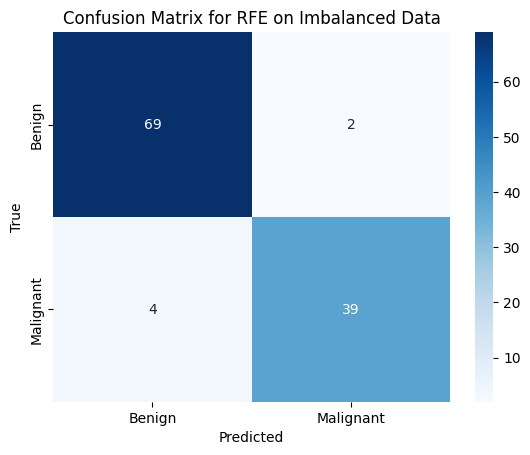

In [ ]:
conf_matrix_rfe = confusion_matrix(y_test, y_pred_rfe)
sns.heatmap(conf_matrix_rfe, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for RFE on Imbalanced Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Starting Learning Curve Analysis...
Estimator: RandomForestClassifier(max_depth=6, max_samples=0.5, min_samples_leaf=8,
                       min_samples_split=20, n_estimators=30, random_state=42)


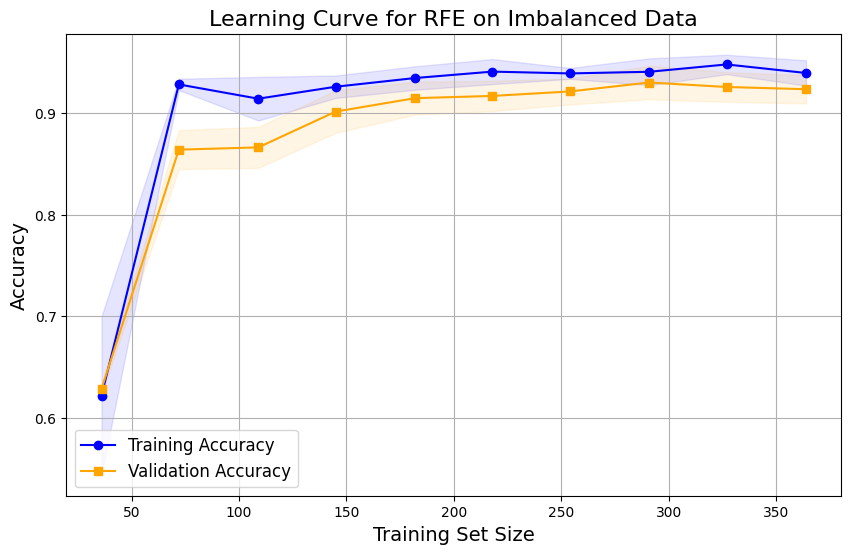

In [ ]:
plot_learning_curve(rf_rfe, X_train_rfe, y_train, cv=5, title="Learning Curve for RFE on Imbalanced Data")

Best parameters for Random Forest (RFE on Imbalanced Data): {'max_depth': 6, 'max_features': 'sqrt', 'max_samples': 0.7, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 30}
Best cross-validated accuracy (RFE on Imbalanced Data): 0.9384615384615385
Classification Report for Best Random Forest (RFE on Imbalanced Data):
               precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Starting Learning Curve Analysis...
Estimator: RandomForestClassifier(max_depth=6, max_samples=0.7, min_samples_leaf=6,
                       min_samples_split=15, n_estimators=30, random_state=42)


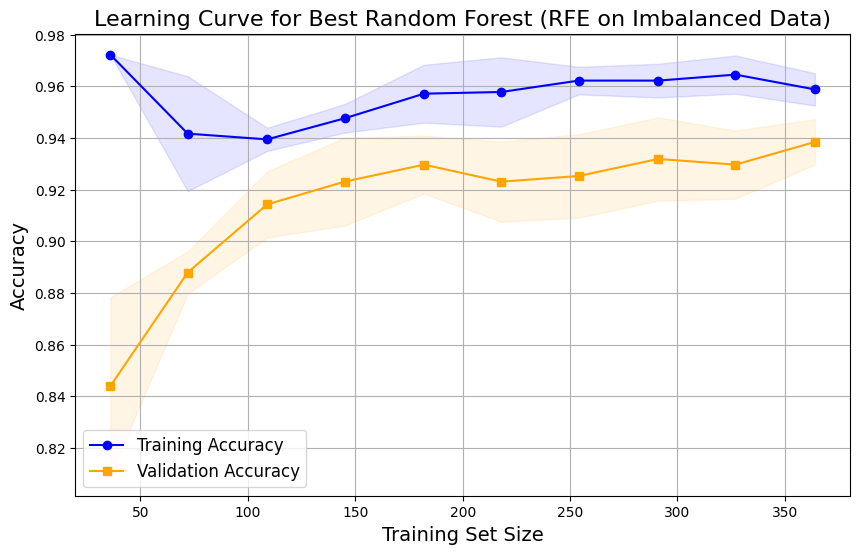

In [ ]:
# Hyperparameter Tuning for RFE on Imbalanced Data
grid_rf_rfe = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid_rf,
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_rf_rfe.fit(X_train_rfe, y_train)

# Print the best parameters and score for the RFE on imbalanced dataset
print("Best parameters for Random Forest (RFE on Imbalanced Data):", grid_rf_rfe.best_params_)
print("Best cross-validated accuracy (RFE on Imbalanced Data):", grid_rf_rfe.best_score_)

# Train the model with the best parameters
best_rf_rfe = grid_rf_rfe.best_estimator_
best_rf_rfe.fit(X_train_rfe, y_train)
y_pred_best_rf_rfe = best_rf_rfe.predict(X_test_rfe)


In [ ]:
# Compute the confusion matrix
conf_matrix_best_rf_rfe = confusion_matrix(y_test, y_pred_best_rf_rfe)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_best_rf_rfe, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Best Random Forest (RFE on Imbalanced Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Print the classification report for the best model
print("Classification Report for Best Random Forest (RFE on Imbalanced Data):\n", classification_report(y_test, y_pred_best_rf_rfe, target_names=['Benign', 'Malignant']))

In [ ]:
# Plot the learning curve for the best model
plot_learning_curve(best_rf_rfe, X_train_rfe, y_train, cv=5, title="Learning Curve for Best Random Forest (RFE on Imbalanced Data)")

In [ ]:
joblib.dump(best_rf_rfe, '/content/drive/My Drive/best_rf_rfe.pkl')

['/content/drive/My Drive/best_rf_rfe.pkl']

In [ ]:
### Scenario 3: Apply SMOTE to Balance Data and Train Model ###
print("\n----- Training with SMOTE Balanced Data -----")
print("Original class distribution:", Counter(y_train))
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:", Counter(y_train_balanced))
rf1 = RandomForestClassifier(n_estimators=30,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=8,
    max_features='sqrt',
    max_samples=0.5,
    random_state=42)
rf1.fit(X_train_balanced, y_train_balanced)
perform_cross_validation(rf1, X_train_balanced, y_train_balanced)
y_pred_rf1 = rf1.predict(X_test)
print("Random Forest Accuracy after SMOTE:", accuracy_score(y_test, y_pred_rf1))


----- Training with SMOTE Balanced Data -----
Original class distribution: Counter({0: 286, 1: 169})
Class distribution after SMOTE: Counter({0: 286, 1: 286})
Cross-validation scores (f1): [0.92307692 0.96551724 0.9009009  0.95652174 0.97391304]
Average cross-validation score (f1): 0.9440
Random Forest Accuracy after SMOTE: 0.9649122807017544


In [ ]:
print("Classification Report after SMOTE:\n", classification_report(y_test, y_pred_rf1, target_names=['Benign', 'Malignant']))

Classification Report after SMOTE:
               precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        71
   Malignant       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



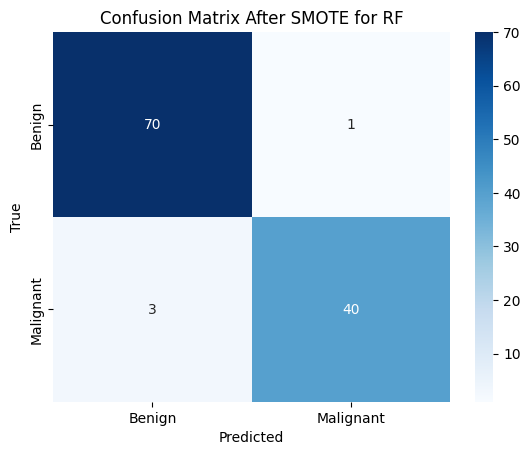

In [ ]:
conf_matrix_rf1 = confusion_matrix(y_test, y_pred_rf1)
sns.heatmap(conf_matrix_rf1, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix After SMOTE for RF')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Starting Learning Curve Analysis...
Estimator: RandomForestClassifier(max_depth=6, max_samples=0.5, min_samples_leaf=8,
                       min_samples_split=20, n_estimators=30, random_state=42)


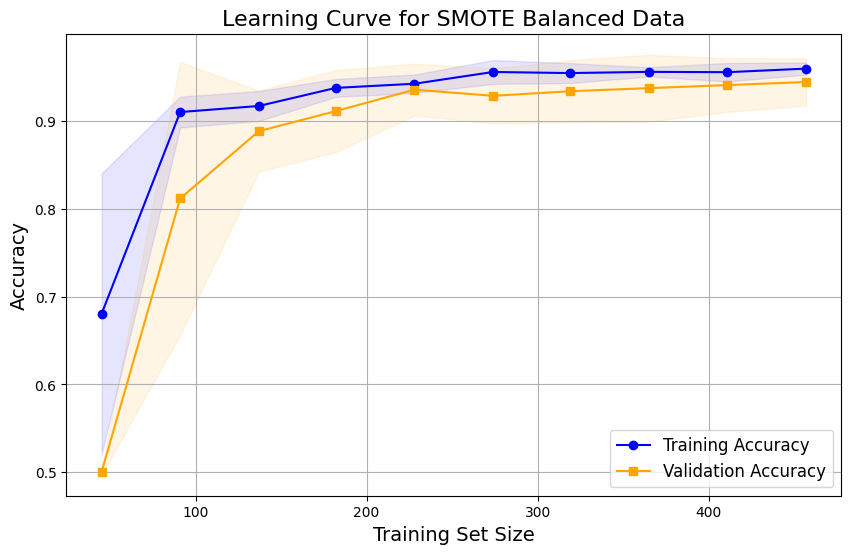

In [ ]:
plot_learning_curve(rf1, X_train_balanced, y_train_balanced, cv=5, title="Learning Curve for SMOTE Balanced Data")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest (SMOTE Balanced Data): {'max_depth': 5, 'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 30}
Best cross-validated accuracy (SMOTE Balanced Data): 0.9510450038138826
Classification Report for Best Random Forest (SMOTE Balanced Data):
               precision    recall  f1-score   support

      Benign       0.97      0.96      0.96        71
   Malignant       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Starting Learning Curve Analysis...
Estimator: RandomForestClassifier(max_depth=5, max_samples=0.6, min_samples_leaf=6,
                       min_samples_split=15, n_estimators=30, random_state=42)


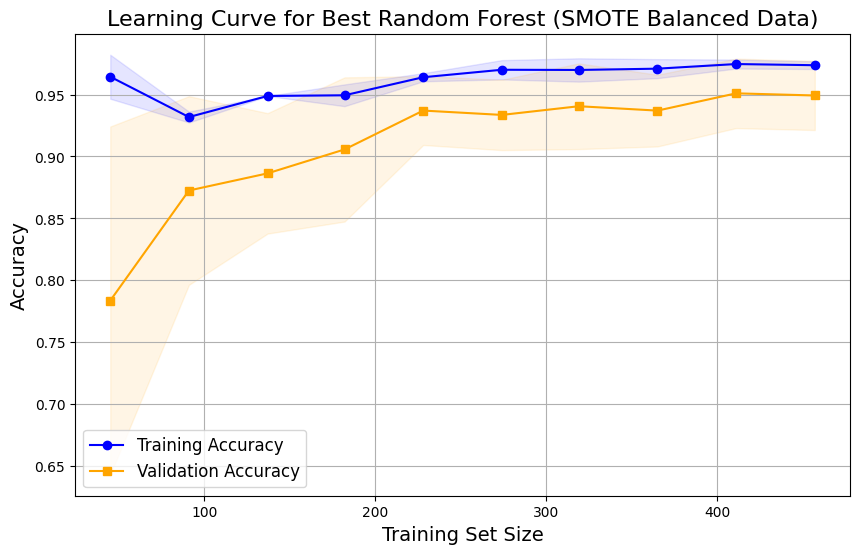

In [ ]:
# Hyperparameter Tuning for SMOTE Balanced Data
grid_rf_smote = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                             param_grid=param_grid_rf,
                             cv=5, scoring='accuracy', n_jobs=-1)
grid_rf_smote.fit(X_train_balanced, y_train_balanced)

# Print the best parameters and score for the SMOTE balanced dataset
print("Best parameters for Random Forest (SMOTE Balanced Data):", grid_rf_smote.best_params_)
print("Best cross-validated accuracy (SMOTE Balanced Data):", grid_rf_smote.best_score_)

# Train the model with the best parameters
best_rf_smote = grid_rf_smote.best_estimator_
best_rf_smote.fit(X_train_balanced, y_train_balanced)
y_pred_best_rf_smote = best_rf_smote.predict(X_test)

# Print the classification report for the best model
print("Classification Report for Best Random Forest (SMOTE Balanced Data):\n", classification_report(y_test, y_pred_best_rf_smote, target_names=['Benign', 'Malignant']))

# Plot the learning curve for the best model
plot_learning_curve(best_rf_smote, X_train_balanced, y_train_balanced, cv=5, title="Learning Curve for Best Random Forest (SMOTE Balanced Data)")


In [ ]:
# Compute the confusion matrix
conf_matrix_rf_smote = confusion_matrix(y_test, y_pred_best_rf_smote)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Best Random Forest (SMOTE Balanced Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
joblib.dump(best_rf_smote, '/content/drive/My Drive/best_rf_smote.pkl')

['/content/drive/My Drive/best_rf_smote.pkl']

In [ ]:
### Scenario 4: Apply RFE After SMOTE and Train Model ###
print("\n----- Training with RFE on SMOTE Balanced Data -----")
rfe_selector_smot_rf = RFE(estimator=rf1, n_features_to_select=10, step=1)
rfe_selector_smot_rf.fit(X_train_balanced, y_train_balanced)
X_train_rfe_smot = rfe_selector_smot_rf.transform(X_train_balanced)
X_test_rfe_smot = rfe_selector_smot_rf.transform(X_test)
rf_rfe_smot = RandomForestClassifier(n_estimators=30,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=8,
    max_features='sqrt',
    max_samples=0.5,
    random_state=42)
rf_rfe_smot.fit(X_train_rfe_smot, y_train_balanced)
perform_cross_validation(rf_rfe_smot, X_train_rfe_smot, y_train_balanced)
y_pred_rfe_smot = rf_rfe_smot.predict(X_test_rfe_smot)
print("Random Forest Accuracy (RFE after SMOTE):", accuracy_score(y_test, y_pred_rfe_smot))


----- Training with RFE on SMOTE Balanced Data -----
Cross-validation scores (f1): [0.89473684 0.95726496 0.86725664 0.93333333 0.95726496]
Average cross-validation score (f1): 0.9220
Random Forest Accuracy (RFE after SMOTE): 0.9649122807017544


In [ ]:
print("Classification Report (RFE after SMOTE):\n", classification_report(y_test, y_pred_rfe_smot, target_names=['Benign', 'Malignant']))

Classification Report (RFE after SMOTE):
               precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        71
   Malignant       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



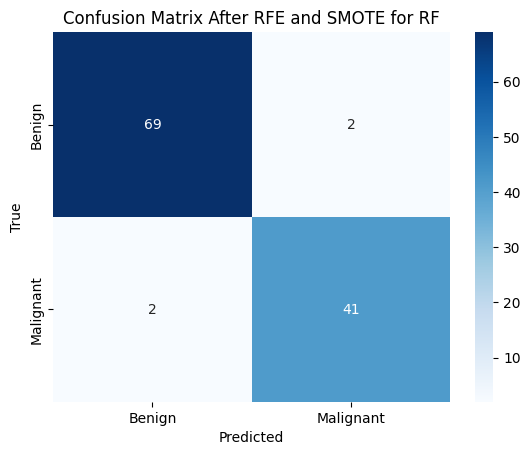

In [ ]:
conf_matrix_rfe_smot = confusion_matrix(y_test, y_pred_rfe_smot)
sns.heatmap(conf_matrix_rfe_smot, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix After RFE and SMOTE for RF')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Starting Learning Curve Analysis...
Estimator: RandomForestClassifier(max_depth=6, max_samples=0.5, min_samples_leaf=8,
                       min_samples_split=20, n_estimators=30, random_state=42)


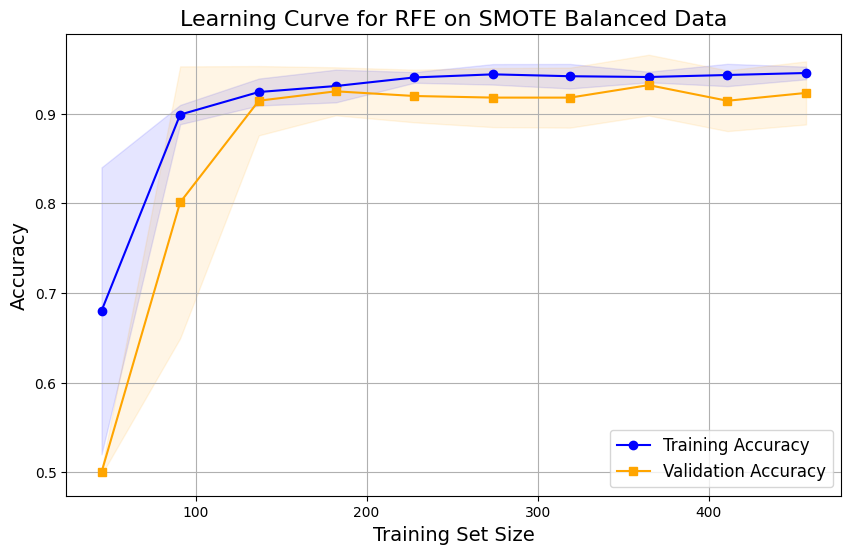

In [ ]:
plot_learning_curve(rf_rfe_smot, X_train_rfe_smot, y_train_balanced, cv=5, title="Learning Curve for RFE on SMOTE Balanced Data")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest (RFE on SMOTE Balanced Data): {'max_depth': 5, 'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 50}
Best cross-validated accuracy (RFE on SMOTE Balanced Data): 0.9475514874141876
Classification Report for Best Random Forest (RFE on SMOTE Balanced Data):
               precision    recall  f1-score   support

      Benign       0.97      0.97      0.97        71
   Malignant       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Starting Learning Curve Analysis...
Estimator: RandomForestClassifier(max_depth=5, max_samples=0.6, min_samples_leaf=6,
                       min_samples_split=15, n_estimators=50, random_state=42)


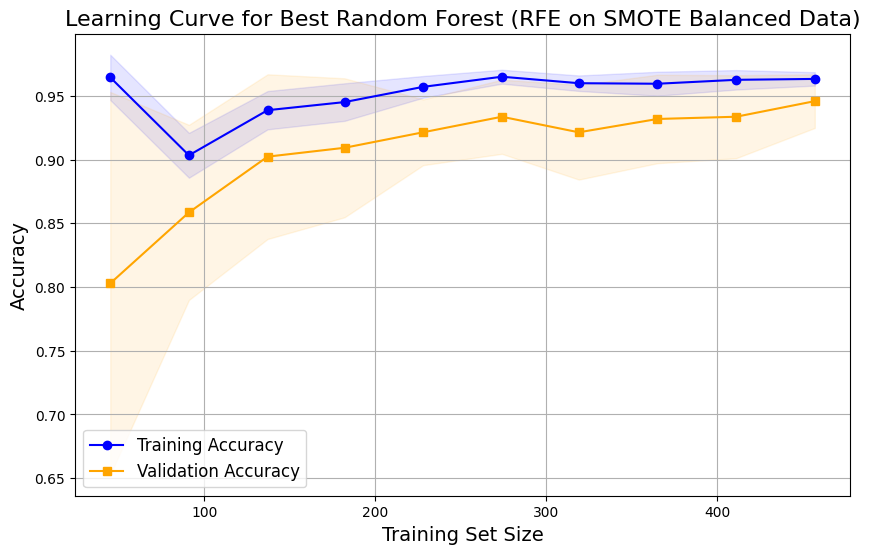

In [ ]:
# Hyperparameter Tuning for RFE on SMOTE Balanced Data
grid_rf_rfe_smote = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                 param_grid=param_grid_rf,
                                 cv=5, scoring='accuracy', n_jobs=-1)
grid_rf_rfe_smote.fit(X_train_rfe_smot, y_train_balanced)

# Print the best parameters and score for the RFE on SMOTE balanced dataset
print("Best parameters for Random Forest (RFE on SMOTE Balanced Data):", grid_rf_rfe_smote.best_params_)
print("Best cross-validated accuracy (RFE on SMOTE Balanced Data):", grid_rf_rfe_smote.best_score_)

# Train the model with the best parameters
best_rf_rfe_smote = grid_rf_rfe_smote.best_estimator_
best_rf_rfe_smote.fit(X_train_rfe_smot, y_train_balanced)
y_pred_best_rf_rfe_smote = best_rf_rfe_smote.predict(X_test_rfe_smot)

# Print the classification report for the best model
print("Classification Report for Best Random Forest (RFE on SMOTE Balanced Data):\n", classification_report(y_test, y_pred_best_rf_rfe_smote, target_names=['Benign', 'Malignant']))

# Plot the learning curve for the best model
plot_learning_curve(best_rf_rfe_smote, X_train_rfe_smot, y_train_balanced, cv=5, title="Learning Curve for Best Random Forest (RFE on SMOTE Balanced Data)")

In [ ]:
# Compute the confusion matrix
conf_matrix_smote_rfe_smote = confusion_matrix(y_test, y_pred_best_rf_rfe_smote)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_smote_rfe_smote, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Best Random Forest (RFE on SMOTE Balanced Data)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
joblib.dump(best_rf_rfe_smote, '/content/drive/My Drive/best_rf_rfe_smote.pkl')

['/content/drive/My Drive/best_rf_rfe_smote.pkl']

In [ ]:
# Load column names from the specified text file
columns_file_path_mamm = '/content/drive/MyDrive/Colab Notebooks/mammographic+mass/column_name_mamm.txt'
with open(columns_file_path_mamm, 'r') as file:
    column_names_mamm = file.read().splitlines()

# Load the main dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/mammographic+mass/mammographic_masses.data'
data_mamm = pd.read_csv(file_path, header=None, names=column_names_mamm)

# Display the first few rows to verify
print(data_mamm.head())


  BI_RADS Age Shape Margin Density  Severity
0       5  67     3      5       3         1
1       4  43     1      1       ?         1
2       5  58     4      5       3         1
3       4  28     1      1       3         0
4       5  74     1      5       ?         1


In [ ]:
print(data_mamm.head())

  BI_RADS Age Shape Margin Density  Severity
0       5  67     3      5       3         1
1       4  43     1      1       ?         1
2       5  58     4      5       3         1
3       4  28     1      1       3         0
4       5  74     1      5       ?         1


In [ ]:
import numpy as np
import pandas as pd

# Convert placeholders like '?' to NaN
data_mamm.replace('?', np.nan, inplace=True)

#Count NaN values in each column
nan_count = data_mamm.isna().sum()

# Print the count of NaN values for each column
print(nan_count)


BI_RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64


In [ ]:
# Calculate the proportion of missing values for each column
missing_proportion = data_mamm.isna().sum() / len(data_mamm)
print(missing_proportion)


BI_RADS     0.002081
Age         0.005203
Shape       0.032258
Margin      0.049948
Density     0.079084
Severity    0.000000
dtype: float64


In [ ]:
# Loop through the categorical columns and fill missing values with mode
categorical_columns = ['BI_RADS', 'Age', 'Shape', 'Margin', 'Density']

for column in categorical_columns:
    # Calculate the mode value
    mode_value = data_mamm[column].mode()[0]  # Get the mode
    # Fill missing values and assign it back to the DataFrame
    data_mamm[column] = data_mamm[column].fillna(mode_value)

In [ ]:
# Convert Age to numeric after filling missing values, if applicable
data_mamm['Age'] = pd.to_numeric(data_mamm['Age'], errors='coerce')


In [ ]:
# Verify if there are any remaining missing values for Mammographic data
missing_values = data_mamm.isnull().sum()
print(missing_values)


BI_RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64


In [ ]:
print(data_mamm.dtypes)

BI_RADS     object
Age          int64
Shape       object
Margin      object
Density     object
Severity     int64
dtype: object


In [ ]:
data_mamm

,BI_RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,4,43,1,1,3,1
2,5,58,4,5,3,1
3,4,28,1,1,3,0
4,5,74,1,5,3,1
...,...,...,...,...,...,...
956,4,47,2,1,3,0
957,4,56,4,5,3,1
958,4,64,4,5,3,0
959,5,66,4,5,3,1


In [ ]:
data_mamm.shape
data_mamm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   BI_RADS   961 non-null    object
 1   Age       961 non-null    int64 
 2   Shape     961 non-null    object
 3   Margin    961 non-null    object
 4   Density   961 non-null    object
 5   Severity  961 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 45.2+ KB


In [ ]:
malig_count_mamm = data_mamm['Severity'].value_counts().get(1)
begn_count_mamm = data_mamm['Severity'].value_counts().get(0)

print('Num of malignant cases:', malig_count_mamm)
print('Num of benign cases:', begn_count_mamm)


Num of malignant cases: 445
Num of benign cases: 516


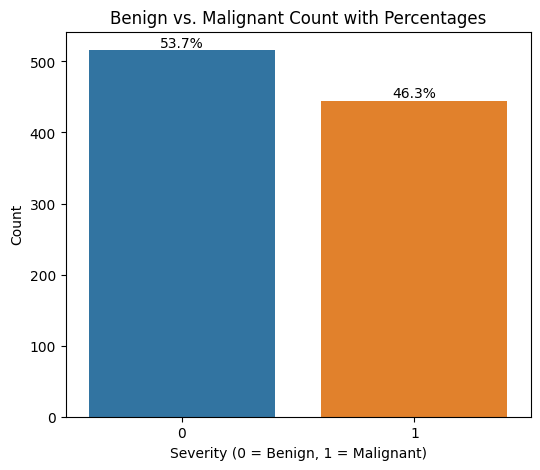

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))
# Use hue instead of x for the color palette
ax_mamm = sns.countplot(data=data_mamm, x='Severity', hue='Severity', palette=["#1f77b4", "#ff7f0e"], legend=False)
total = len(data_mamm)

# Add percentage labels above each bar
for p in ax_mamm.patches:
    percentage = f"{100 * p.get_height() / total:.1f}%"
    ax_mamm.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.title('Benign vs. Malignant Count with Percentages')
plt.xlabel('Severity (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()


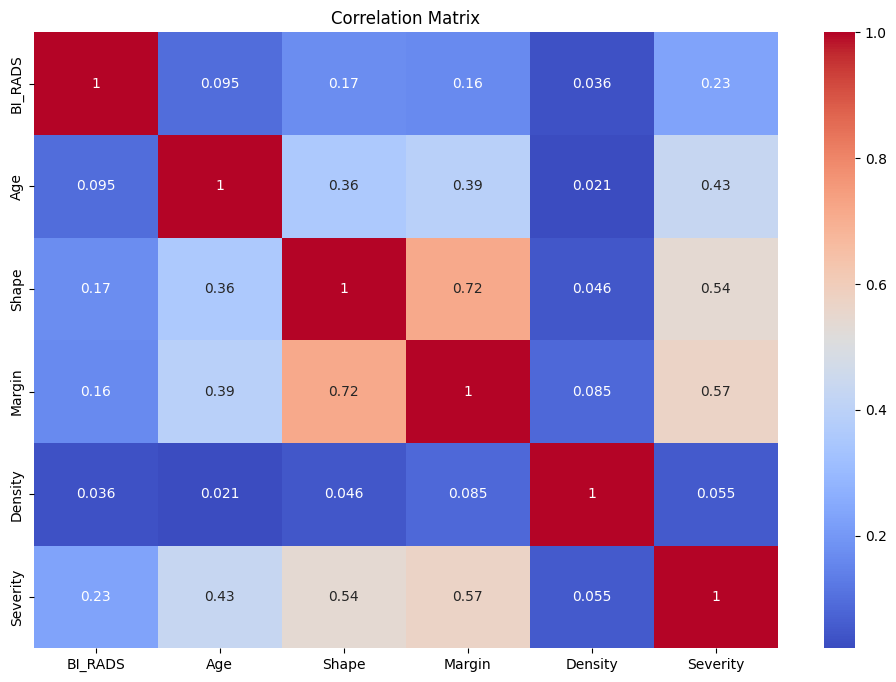

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for multicollinearity with a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data_mamm.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Drop the BI-RADS column (non-predictive)
data_mamm.drop(columns=['BI_RADS'], inplace=True)

In [ ]:
data_mamm

,Age,Shape,Margin,Density,Severity
0,67,3,5,3,1
1,43,1,1,3,1
2,58,4,5,3,1
3,28,1,1,3,0
4,74,1,5,3,1
...,...,...,...,...,...
956,47,2,1,3,0
957,56,4,5,3,1
958,64,4,5,3,0
959,66,4,5,3,1


In [ ]:
# Convert relevant columns to categorical types
data_mamm['Shape'] = data_mamm['Shape'].astype('category')
data_mamm['Margin'] = data_mamm['Margin'].astype('category')
data_mamm['Density'] = data_mamm['Density'].astype('category')

In [ ]:

# Convert categorical columns to their numeric codes for aggregation
data_mamm['Shape'] = data_mamm['Shape'].cat.codes
data_mamm['Margin'] = data_mamm['Margin'].cat.codes
data_mamm['Density'] = data_mamm['Density'].cat.codes

# Now you can group by and calculate mean
mean_values = data_mamm.groupby('Severity').mean()
print(mean_values)


                Age     Shape    Margin   Density
Severity                                         
0         49.713178  1.139535  0.872093  1.899225
1         62.222472  2.485393  2.674157  1.939326


In [ ]:
# Convert relevant columns to categorical types
data_mamm['Shape'] = data_mamm['Shape'].astype('category')
data_mamm['Margin'] = data_mamm['Margin'].astype('category')

In [ ]:
data_mamm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Age       961 non-null    int64   
 1   Shape     961 non-null    category
 2   Margin    961 non-null    category
 3   Density   961 non-null    int8    
 4   Severity  961 non-null    int64   
dtypes: category(2), int64(2), int8(1)
memory usage: 18.2 KB


In [ ]:
data_mamm.describe()

,Age,Density,Severity
count,961.000000,961.000000,961.000000
mean,55.505723,1.917794,0.463059
std,14.444586,0.365869,0.498893
min,18.000000,0.000000,0.000000
25%,45.000000,2.000000,0.000000
50%,57.000000,2.000000,0.000000
75%,66.000000,2.000000,1.000000
max,96.000000,3.000000,1.000000


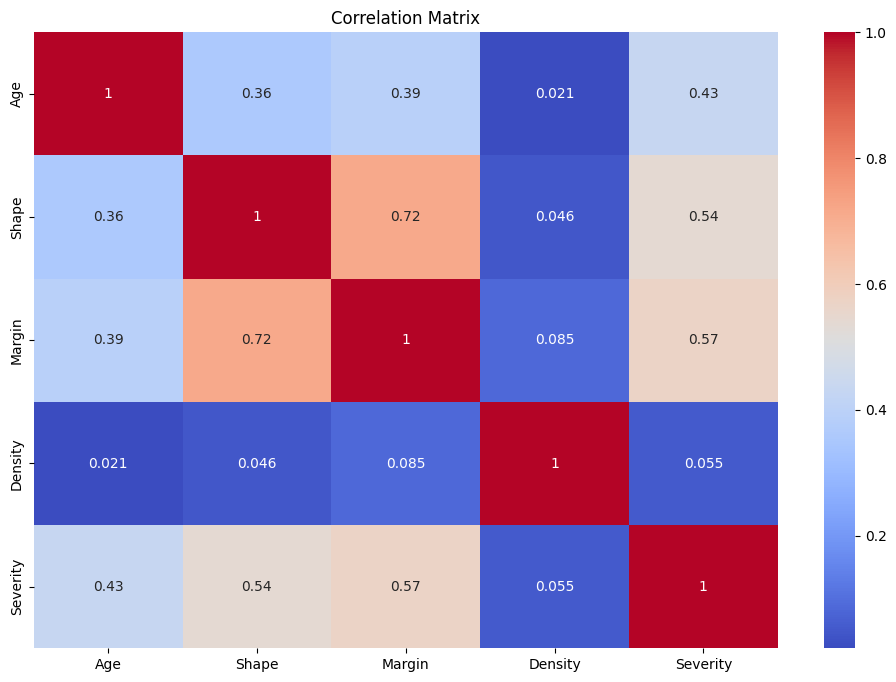

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for multicollinearity with a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data_mamm.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Define feature matrix and target variable
X_mamm = data_mamm.drop(columns=['Severity'])
y_mamm = data_mamm['Severity']

In [ ]:
# Step 1: Standardize the 'Age' column
scaler = StandardScaler()
age_scaled = scaler.fit_transform(X_mamm[['Age']])
age_scaled = pd.DataFrame(age_scaled, columns=['Age'])
density_scaled = scaler.fit_transform(X_mamm[['Density']])
density_scaled = pd.DataFrame(density_scaled, columns=['Density'])

In [ ]:

# Step 2: One-Hot Encode 'Shape', 'Margin', and 'Density'
from sklearn.preprocessing import StandardScaler, OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, drop=None)  # drop='first' to avoid dummy variable trap if needed
categorical_encoded = encoder.fit_transform(X_mamm[['Shape', 'Margin']])

# Convert the encoded array to a DataFrame with proper column names
categorical_encoded = pd.DataFrame(
    categorical_encoded,
    columns=encoder.get_feature_names_out(['Shape', 'Margin'])
)

# Step 3: Concatenate scaled 'Age' and encoded categorical features
X_transformed = pd.concat([age_scaled,density_scaled, categorical_encoded], axis=1)

In [ ]:
print(X_transformed.head())


        Age   Density  Shape_0  Shape_1  Shape_2  Shape_3  Margin_0  Margin_1  \
0  0.796164  0.224804      0.0      0.0      1.0      0.0       0.0       0.0   
1 -0.866223  0.224804      1.0      0.0      0.0      0.0       1.0       0.0   
2  0.172769  0.224804      0.0      0.0      0.0      1.0       0.0       0.0   
3 -1.905215  0.224804      1.0      0.0      0.0      0.0       1.0       0.0   
4  1.281027  0.224804      1.0      0.0      0.0      0.0       0.0       0.0   

   Margin_2  Margin_3  Margin_4  
0       0.0       0.0       1.0  
1       0.0       0.0       0.0  
2       0.0       0.0       1.0  
3       0.0       0.0       0.0  
4       0.0       0.0       1.0  


In [ ]:
X_train_mamm, X_test_mamm, y_train_mamm, y_test_mamm = train_test_split(X_transformed, y_mamm, test_size=0.2, random_state=42)



----- Training Random Forest on Imbalanced Data Mamm0 -----
Cross-validation scores (f1): [0.82051282 0.73239437 0.78709677 0.78709677 0.74418605]
Average cross-validation score (f1): 0.7743
Random Forest Accuracy (Imbalanced Data): 0.8238341968911918
Classification Report (Imbalanced Data):
               precision    recall  f1-score   support

      Benign       0.88      0.77      0.82       101
   Malignant       0.78      0.88      0.83        92

    accuracy                           0.82       193
   macro avg       0.83      0.83      0.82       193
weighted avg       0.83      0.82      0.82       193



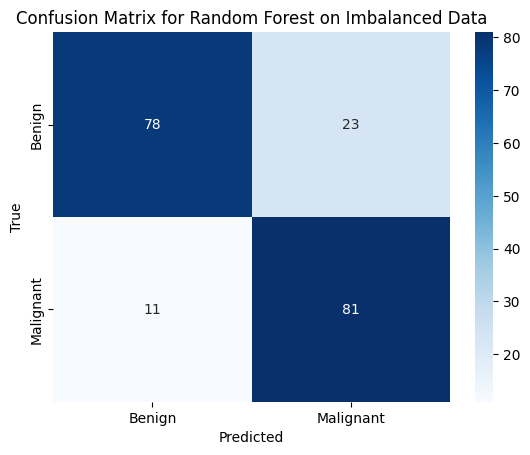

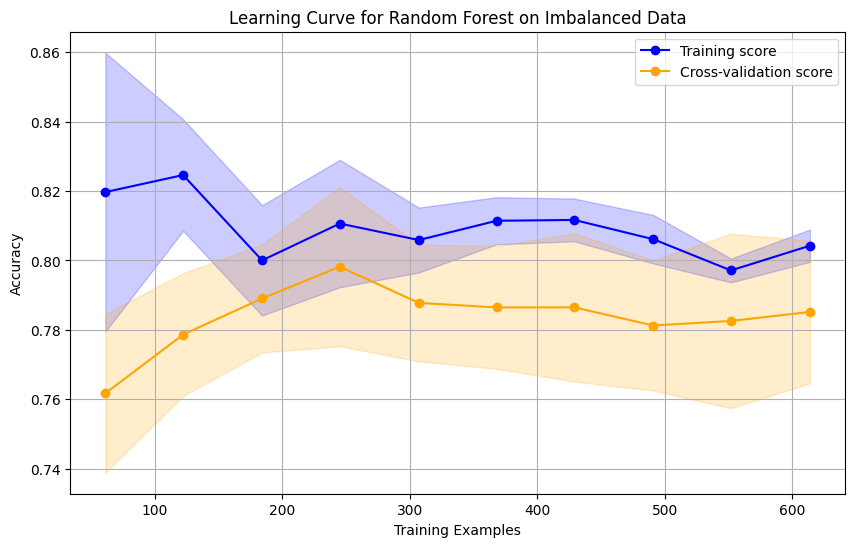

In [ ]:
print("\n----- Training Random Forest on Imbalanced Data Mamm0 -----")
rf_mamm = RandomForestClassifier(n_estimators=30,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=8,
    max_features='sqrt',
    max_samples=0.5,
    random_state=42)
rf_mamm.fit(X_train_mamm, y_train_mamm)
perform_cross_validation(rf_mamm, X_train_mamm, y_train_mamm)
y_pred_rf_mamm = rf_mamm.predict(X_test_mamm)
print("Random Forest Accuracy (Imbalanced Data):", accuracy_score(y_test_mamm, y_pred_rf_mamm))
print("Classification Report (Imbalanced Data):\n", classification_report(y_test_mamm, y_pred_rf_mamm, target_names=['Benign', 'Malignant']))
conf_matrix_rf_mamm = confusion_matrix(y_test_mamm, y_pred_rf_mamm)
sns.heatmap(conf_matrix_rf_mamm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Random Forest on Imbalanced Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plot_learning_curve(rf_mamm, X_train_mamm, y_train_mamm, cv=5,use_smote=False, title="Learning Curve for Random Forest on Imbalanced Data")


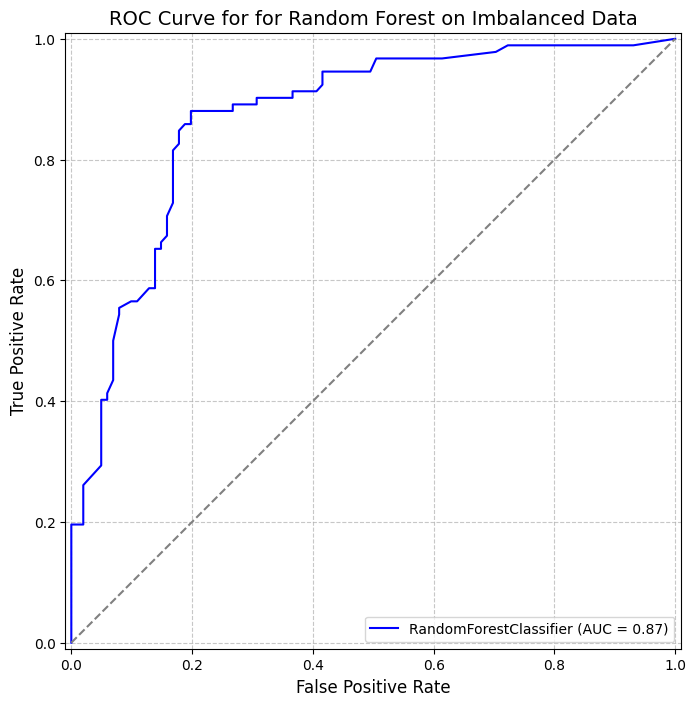

In [ ]:
plot_roc_curve_on(rf_mamm, X_test_mamm, y_test_mamm, title="ROC Curve for for Random Forest on Imbalanced Data")


----- Hyperparameter Tuning for Random Forest on Imbalanced Data -----


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest (Imbalanced Data): {'max_depth': 7, 'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 50}
Best cross-validated accuracy (Imbalanced Data): 0.8020711314828961


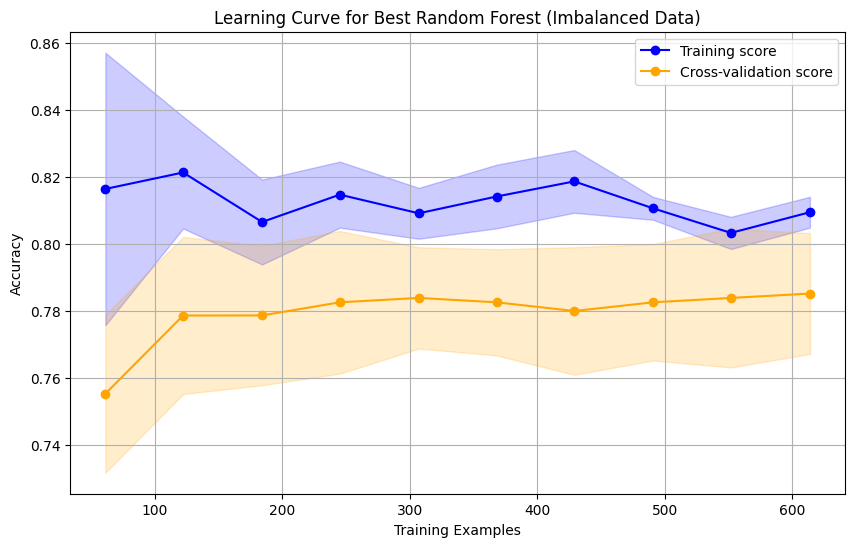

In [ ]:
### Scenario 1: Hyperparameter Tuning for Imbalanced Data ###
print("\n----- Hyperparameter Tuning for Random Forest on Imbalanced Data -----")
grid_rf_imbalanced_mamm = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                        param_grid=param_grid_rf,
                                        cv=5, scoring='accuracy', n_jobs=-1)
grid_rf_imbalanced_mamm.fit(X_train_mamm, y_train_mamm)

# Print the best parameters and score for the imbalanced dataset
print("Best parameters for Random Forest (Imbalanced Data):", grid_rf_imbalanced_mamm.best_params_)
print("Best cross-validated accuracy (Imbalanced Data):", grid_rf_imbalanced_mamm.best_score_)

# Train the model with the best parameters
best_rf_imbalanced_mamm = grid_rf_imbalanced_mamm.best_estimator_
best_rf_imbalanced_mamm.fit(X_train_mamm, y_train_mamm)
plot_learning_curve(best_rf_imbalanced_mamm, X_train_mamm, y_train_mamm, cv=5,use_smote=False, title="Learning Curve for Best Random Forest (Imbalanced Data)")

In [ ]:
joblib.dump(best_rf_imbalanced_mamm, '/content/drive/My Drive/best_rf_imbalanced_mamm.pkl')

['/content/drive/My Drive/best_rf_imbalanced_mamm.pkl']

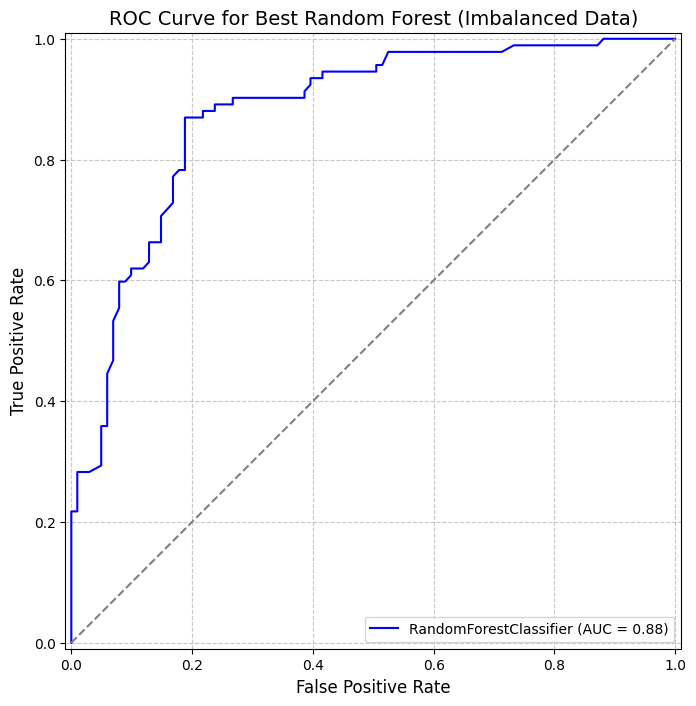

In [ ]:
plot_roc_curve_on(best_rf_imbalanced_mamm, X_test_mamm, y_test_mamm, title="ROC Curve for Best Random Forest (Imbalanced Data)")


----- Training Random Forest with SMOTE Balanced Data Mammo-----
Class distribution after SMOTE: Counter({0: 415, 1: 415})
Cross-validation scores (f1): [0.81355932 0.81656805 0.75581395 0.83060109 0.81481481]
Average cross-validation score (f1): 0.8063
Random Forest Accuracy (SMOTE Balanced Data): 0.8186528497409327
Classification Report (SMOTE Balanced Data):
               precision    recall  f1-score   support

      Benign       0.88      0.76      0.81       101
   Malignant       0.77      0.88      0.82        92

    accuracy                           0.82       193
   macro avg       0.82      0.82      0.82       193
weighted avg       0.83      0.82      0.82       193



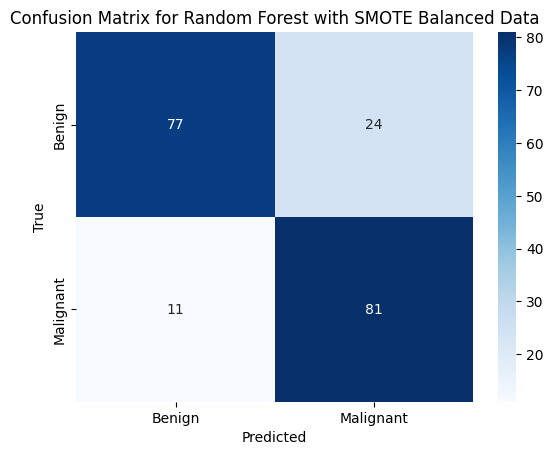

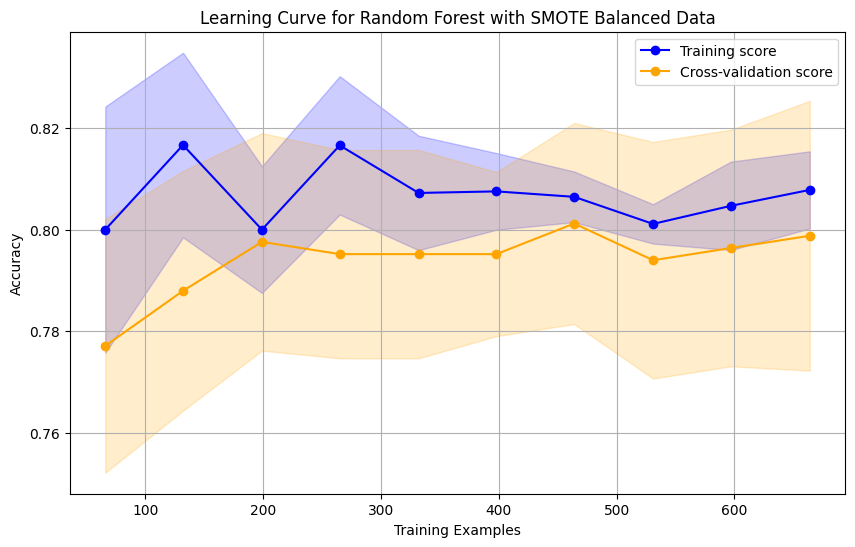

In [ ]:
print("\n----- Training Random Forest with SMOTE Balanced Data Mammo-----")
smote_mamm = SMOTE(random_state=42)
X_train_balanced_mamm, y_train_balanced_mamm = smote_mamm.fit_resample(X_train_mamm, y_train_mamm)
print("Class distribution after SMOTE:", Counter(y_train_balanced_mamm))

rf_smote_mamm = RandomForestClassifier(n_estimators=30,
    max_depth=6,
    min_samples_split=20,
    min_samples_leaf=8,
    max_features='sqrt',
    max_samples=0.5,
    random_state=42)
rf_smote_mamm.fit(X_train_balanced_mamm, y_train_balanced_mamm)
perform_cross_validation(rf_smote_mamm, X_train_balanced_mamm, y_train_balanced_mamm)
y_pred_smote_rf_mamm = rf_smote_mamm.predict(X_test_mamm)
print("Random Forest Accuracy (SMOTE Balanced Data):", accuracy_score(y_test_mamm, y_pred_smote_rf_mamm))
print("Classification Report (SMOTE Balanced Data):\n", classification_report(y_test_mamm, y_pred_smote_rf_mamm, target_names=['Benign', 'Malignant']))
conf_matrix_smote_rf_mamm = confusion_matrix(y_test_mamm, y_pred_smote_rf_mamm)
sns.heatmap(conf_matrix_smote_rf_mamm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix for Random Forest with SMOTE Balanced Data')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
plot_learning_curve(rf_smote_mamm, X_train_balanced_mamm, y_train_balanced_mamm, cv=5,use_smote=True, title="Learning Curve for Random Forest with SMOTE Balanced Data")


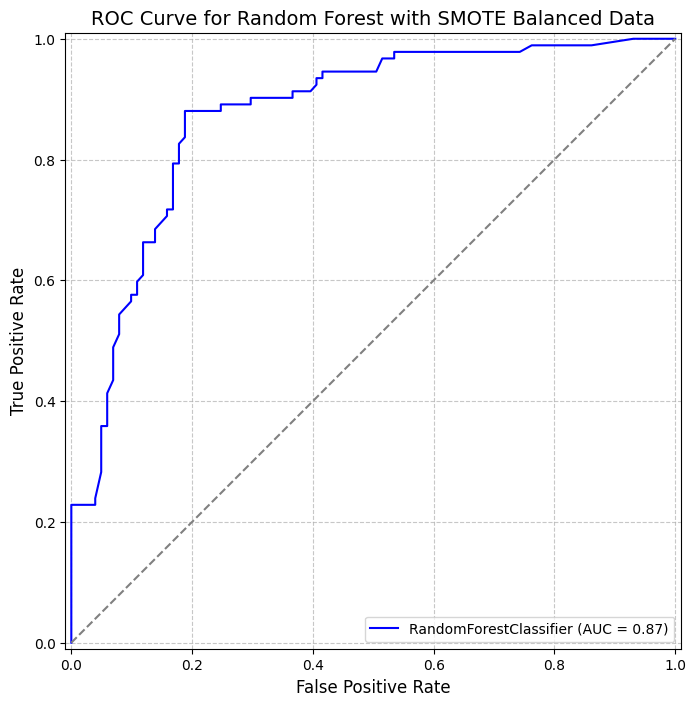

In [ ]:
plot_roc_curve_on(rf_smote_mamm, X_test_mamm, y_test_mamm, title="ROC Curve for Random Forest with SMOTE Balanced Data")


----- Hyperparameter Tuning for Random Forest on SMOTE Balanced Data -----


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest (SMOTE Balanced Data): {'max_depth': 7, 'max_features': 'sqrt', 'max_samples': 0.6, 'min_samples_leaf': 6, 'min_samples_split': 15, 'n_estimators': 50}
Best cross-validated accuracy (SMOTE Balanced Data): 0.8048192771084338


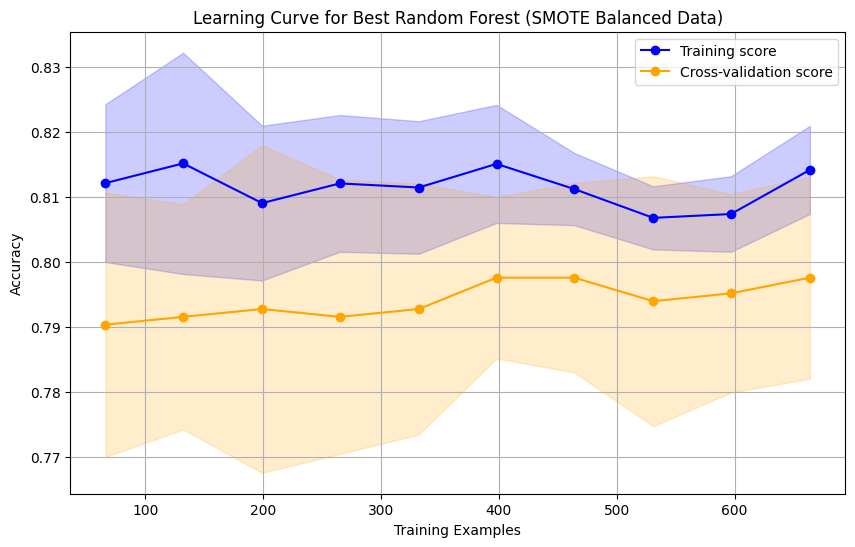

In [ ]:
### Scenario 3: Hyperparameter Tuning for SMOTE Balanced Data ###
print("\n----- Hyperparameter Tuning for Random Forest on SMOTE Balanced Data -----")
smote = SMOTE(random_state=42)
X_train_balanced_mamm, y_train_balanced_mamm = smote.fit_resample(X_train_mamm, y_train_mamm)

grid_rf_smote_mamm = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                                   param_grid=param_grid_rf,
                                   cv=5, scoring='accuracy', n_jobs=-1)
grid_rf_smote_mamm.fit(X_train_balanced_mamm, y_train_balanced_mamm)

# Print the best parameters and score for the SMOTE balanced dataset
print("Best parameters for Random Forest (SMOTE Balanced Data):", grid_rf_smote_mamm.best_params_)
print("Best cross-validated accuracy (SMOTE Balanced Data):", grid_rf_smote_mamm.best_score_)

# Train the model with the best parameters
best_rf_smote_mamm = grid_rf_smote_mamm.best_estimator_
best_rf_smote_mamm.fit(X_train_balanced_mamm, y_train_balanced_mamm)
plot_learning_curve(best_rf_smote_mamm, X_train_balanced_mamm, y_train_balanced_mamm, cv=5,use_smote=True, title="Learning Curve for Best Random Forest (SMOTE Balanced Data)")

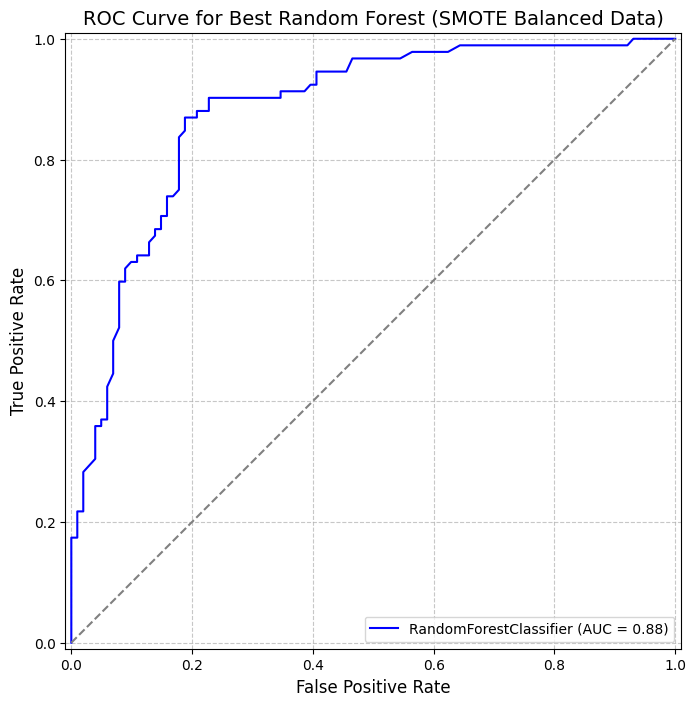

In [ ]:
plot_roc_curve_on(best_rf_smote_mamm, X_test_mamm, y_test_mamm, title="ROC Curve for Best Random Forest (SMOTE Balanced Data)")

In [ ]:
joblib.dump(best_rf_smote_mamm, '/content/drive/My Drive/best_rf_smote_mamm.pkl')

['/content/drive/My Drive/best_rf_smote_mamm.pkl']